# Quantitative Analysis of Price & Daily Returns #

**1.Can returns be described with a normal distribution?**

**2. Is there directional bias in dialy change?**

**3.Can price movement be described as a random walk?**

**1.Set up environment**

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()

**2.Download Stock Price Data, Store in DataFrame**

In [19]:
amzn = yf.download('AMZN', start='2019-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


**3.Take a look at the data**

In [20]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000
2019-01-08,83.234497,83.830498,80.830498,82.829002,82.829002,177628000


**4.Store instantaneous Rate of Return in Separate Series**

In [36]:
amzn_close = amzn['Close']
amzn_return = round(np.log(amzn_close).diff() * 100,2)
amzn_return.head()

Date
2019-01-02     NaN
2019-01-03   -2.56
2019-01-04    4.89
2019-01-07    3.38
2019-01-08    1.65
Name: Close, dtype: float64

**5.Plot the Series**

<Axes: xlabel='Date'>

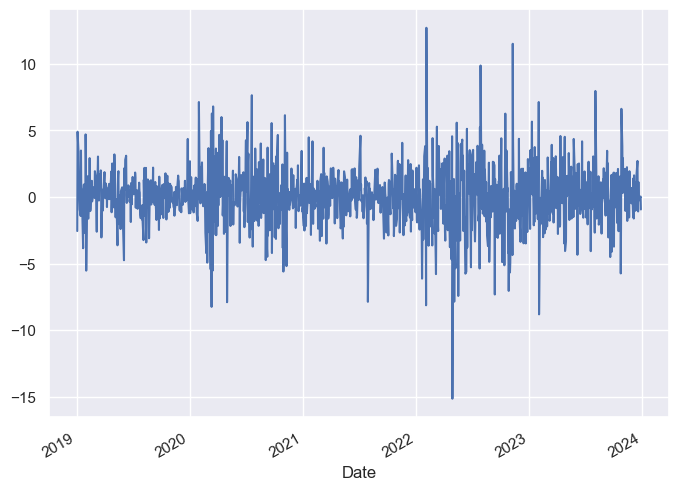

In [37]:
amzn_return.plot()

<Axes: xlabel='Date'>

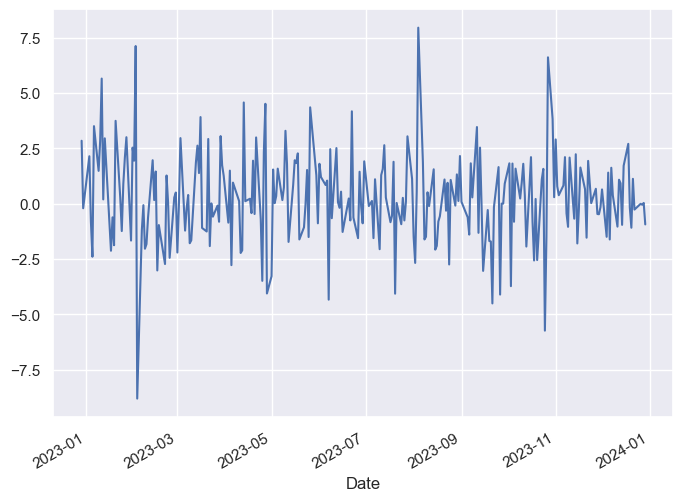

In [38]:
amzn_return[-252:].plot()

**6. Pandas describe function gives descriptive statistics, default assumes you are dwaling with a sample Pandas also deals with missing values by omitting them**

In [39]:
amzn_return.describe()

count    1257.000000
mean        0.054153
std         2.218211
min       -15.140000
25%        -1.090000
50%         0.100000
75%         1.200000
max        12.690000
Name: Close, dtype: float64

In [40]:
amzn_return.dropna(inplace = True)
amzn_return.describe()

count    1257.000000
mean        0.054153
std         2.218211
min       -15.140000
25%        -1.090000
50%         0.100000
75%         1.200000
max        12.690000
Name: Close, dtype: float64

**7. An alternative more slightly different table of descriptives from scipy stats**

In [41]:
from scipy import stats

In [44]:
stats. describe(amzn_return)

DescribeResult(nobs=1257, minmax=(-15.14, 12.69), mean=0.054152744630071616, variance=4.920462199580438, skewness=-0.11802632809468253, kurtosis=4.311624999120341)

In [47]:
n, minmax, mean, var, skew, kurt = stats. describe(amzn_return)
mini, maxi = minmax
std = var ** .5

**8. For comparision generate random numbers that follow normal distribution**

In [48]:
from scipy.stats import norm

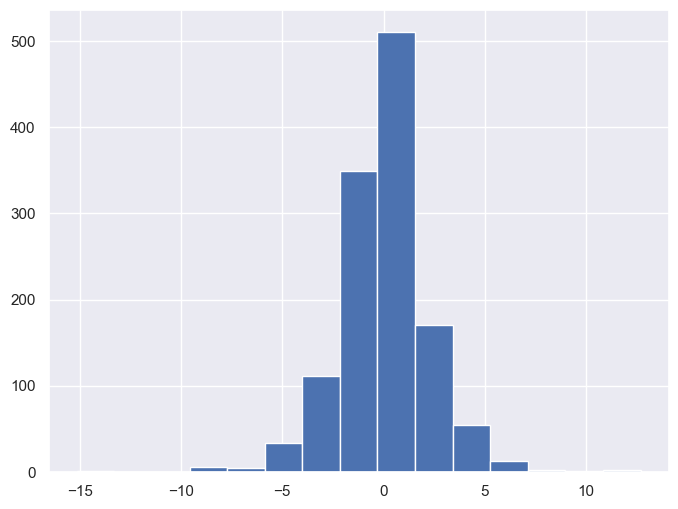

In [50]:
plt.hist(amzn_return, bins = 15);

In [51]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

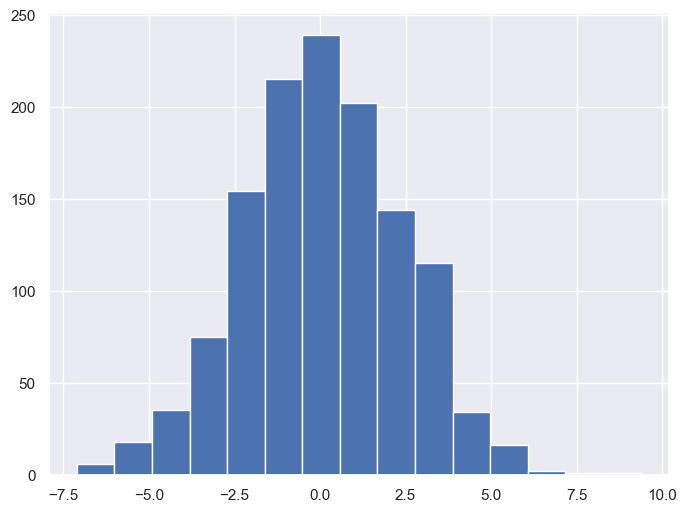

In [52]:
plt.hist(x, bins = 15);

## Is price change normally distributed? ##

**10. Use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable**

In [53]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistics":20}{"p-value" :>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]: 16.4f}")

     Test statistics        p-value
     ------------------------------
x:             0.37          0.7126
AMZN:         11.37          0.0000


**11. Plot histogram of price changes with normal curve overlay**

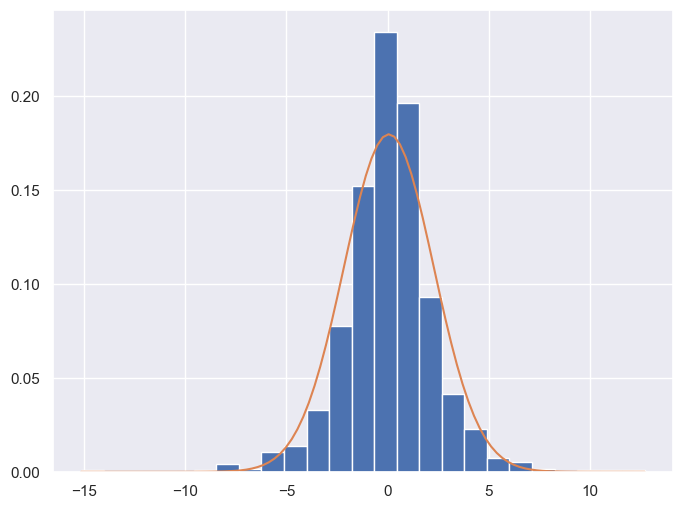

In [54]:
plt.hist(amzn_return, bins = 25, edgecolor= 'w' , density = True) 
overlay = np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

## Is daily price change signigicantly different from zero? ## 

**13.Conduct simple hypothesis test**

In [61]:
stats.ttest_1samp(amzn_return, 0, alternative = 'two-sided')

TtestResult(statistic=0.8655360514072665, pvalue=0.38690992850757966, df=1256)

In [60]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative = 'two-sided')

TtestResult(statistic=-0.8085361564732317, pvalue=0.41954767994183473, df=251)

## Can price movement be described as a random walk? ##

**14.Create price lags**

In [64]:
amzn_close = pd.DataFrame(amzn_close, columns = ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()                                   

,Close,lag_1,lag_2
Date,,,
2019-01-08,82.829002,81.475502,78.769501
2019-01-09,82.971001,82.829002,81.475502
2019-01-10,82.810997,82.971001,82.829002
2019-01-11,82.028000,82.810997,82.971001
2019-01-14,80.860497,82.028000,82.810997


**15. Fit Linear Model**

In [73]:
np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'], rcond = None)[0]

array([0.97392712, 0.02623732])

In [74]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close['Close'], rcond = None)[0]

In [75]:
amzn_close['predict'] =np.dot(amzn_close[['lag_1', 'lag_2']], lr)
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2019-01-08,82.829002,81.475502,78.769501,81.417902
2019-01-09,82.971001,82.829002,81.475502,82.807111
2019-01-10,82.810997,82.971001,82.829002,82.980919
2019-01-11,82.028000,82.810997,82.971001,82.828813
2019-01-14,80.860497,82.028000,82.810997,82.062033


<Axes: xlabel='Date'>

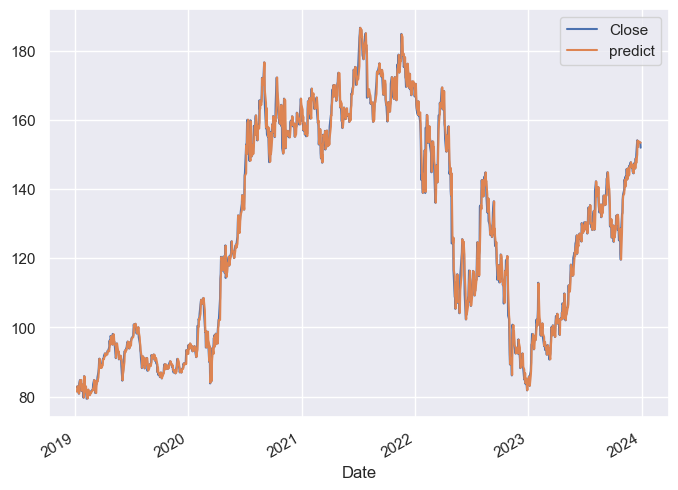

In [77]:
amzn_close[['Close', 'predict']].plot()

<Axes: xlabel='Date'>

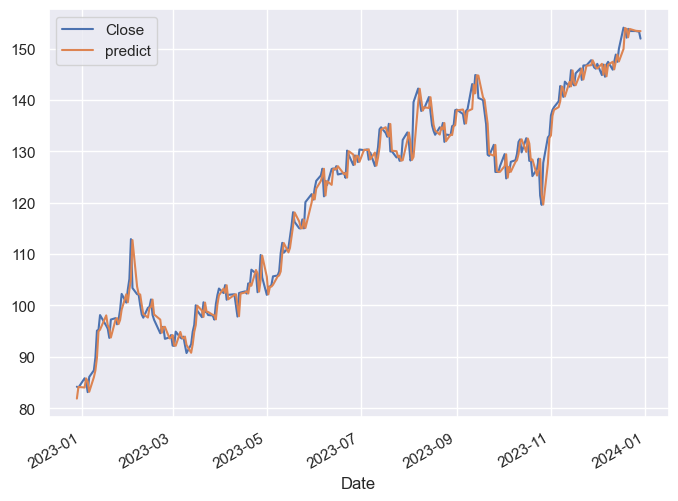

In [78]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()